# Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| CRIM|	per capita crime rate by town|
| ZN|	proportion of residential land zoned for lots over 25,000 sq.ft.|
| INDUS| proportion of non-retail business acres per town.	|
| CHAS| Charles River dummy variable (1 if tract bounds river; 0 otherwise)	|
| NOX|	nitric oxides concentration (parts per 10 million)|
| RM|	average number of rooms per dwelling|
| AGE|	proportion of owner-occupied units built prior to 1940 |
| DIS|	weighted distances to five Boston employment centres |
| RAD|	index of accessibility to radial highways |
| TAX |	full-value property-tax rate per 10,000  |
| PTRATIO |	 pupil-teacher ratio by town|
| LSTAT|  lower status of the population|
| MEDV | Median value of owner-occupied homes in 1000s|

In [8]:
# Boston Housing Side Projects


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.read_csv('boston_housing.csv')
data.describe()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [9]:
data

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [10]:
data.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

# Task 2: Descriptive Statistics and Visualizations

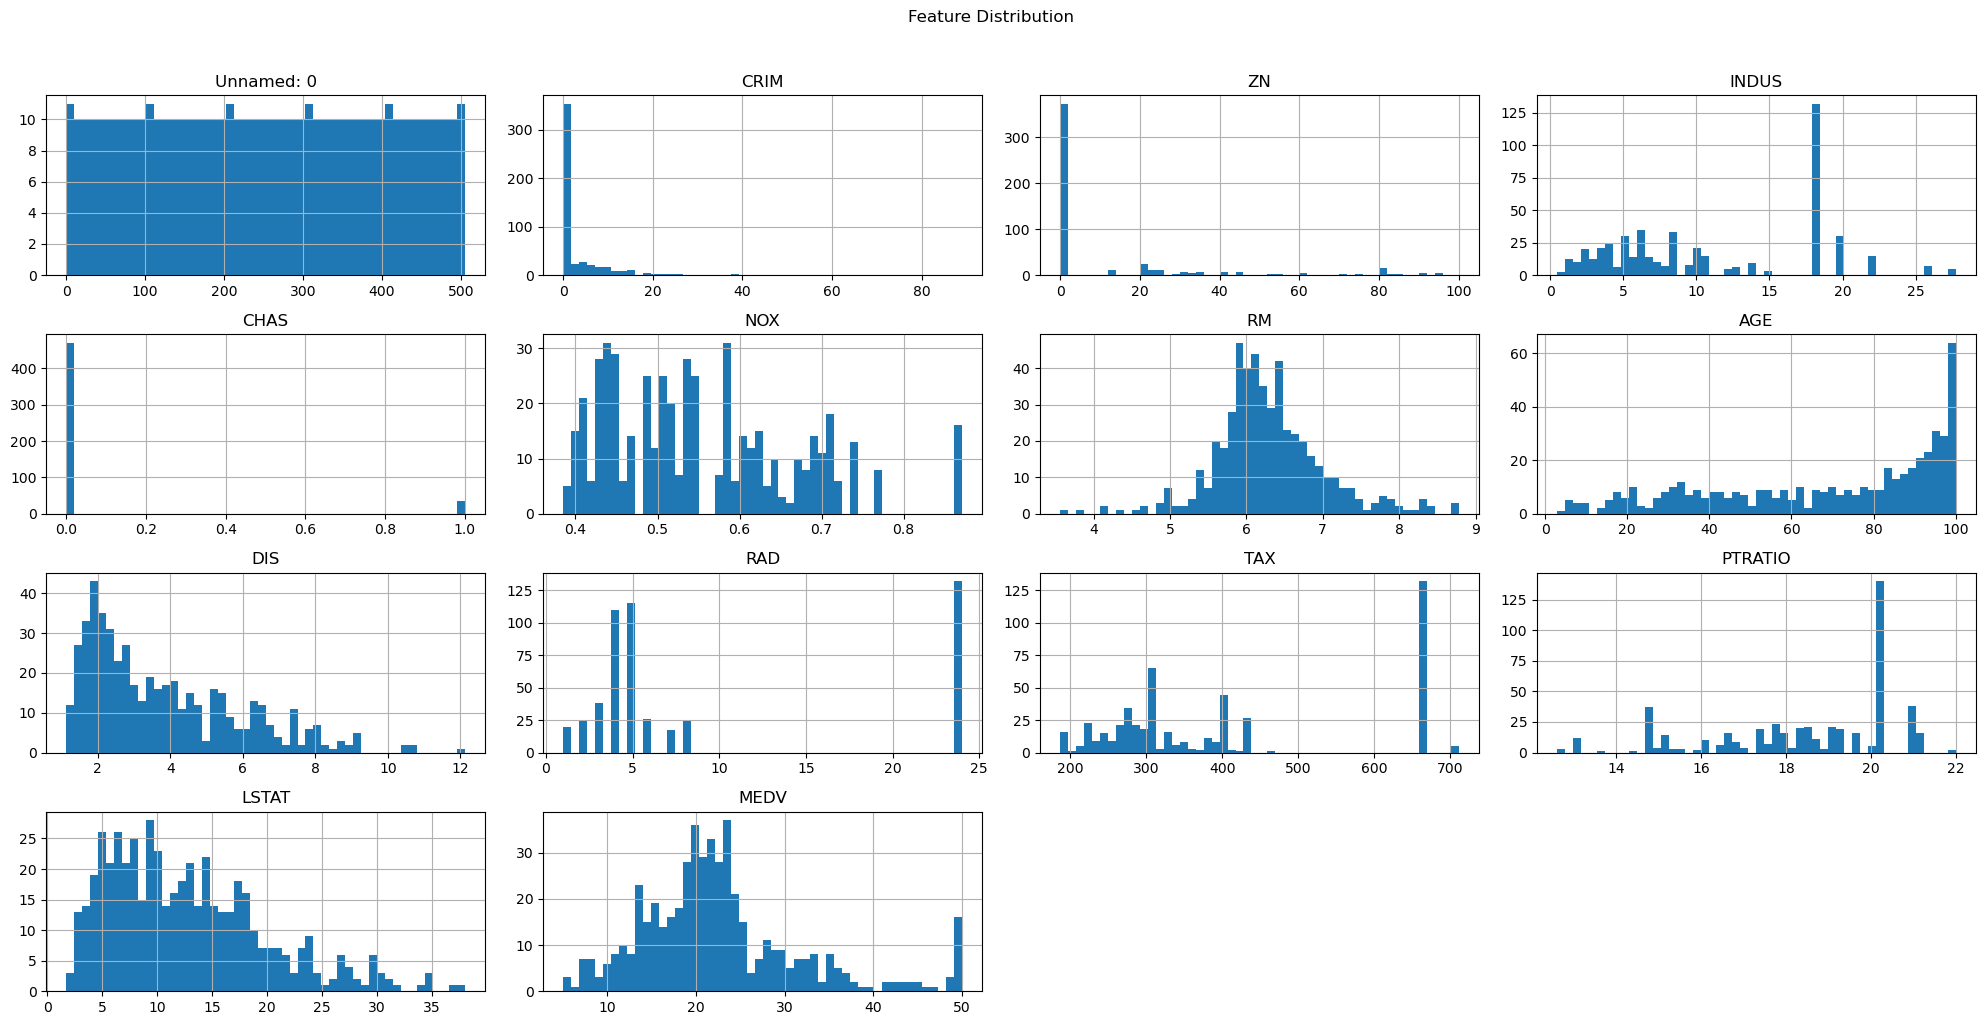

In [11]:
data.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

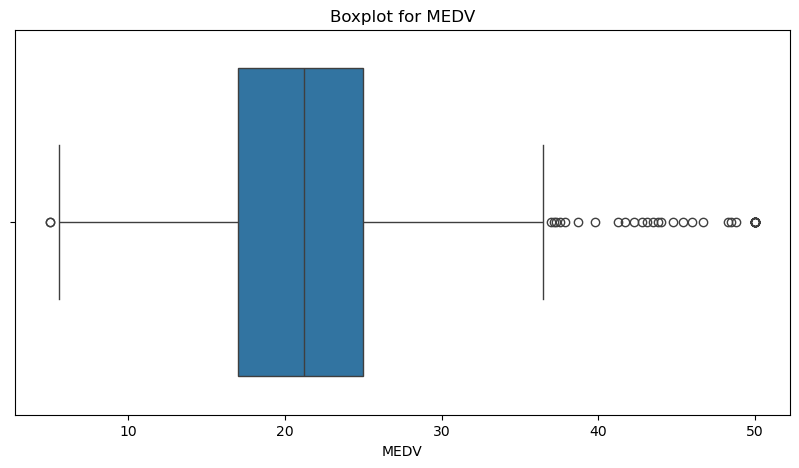

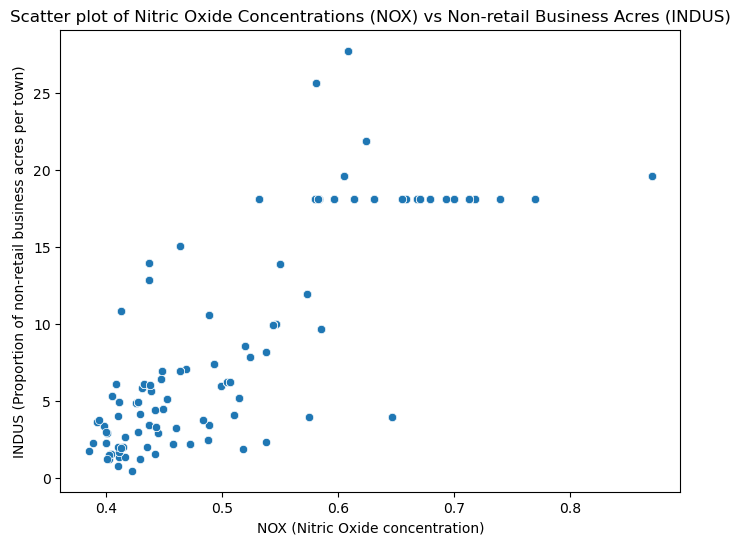

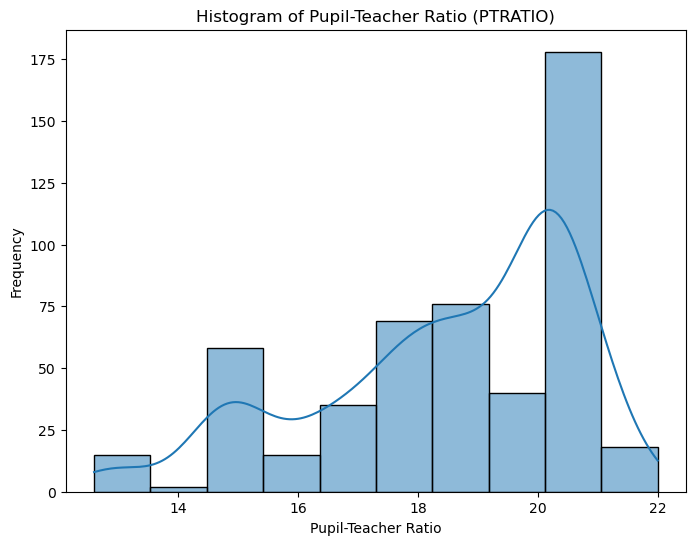

In [ ]:
#For the "Median value of owner-occupied homes" provide a boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=data.MEDV)
plt.title("Boxplot for MEDV")
plt.show()



#Scatter plot for NOX vs INDUS
plt.figure(figsize=(8,6))
sns.scatterplot(x='NOX', y='INDUS', data=data)
plt.title('Scatter plot of Nitric Oxide Concentrations (NOX) vs Non-retail Business Acres (INDUS)')
plt.xlabel('NOX (Nitric Oxide concentration)')
plt.ylabel('INDUS (Proportion of non-retail business acres per town)')
plt.show()

#Histogram for Pupil-Teacher Ratio (PTRATIO)
plt.figure(figsize=(8,6))
sns.histplot(data['PTRATIO'], bins=10, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()
